# Tarea 3: Enumeración exacta

## Fecha límite de entrega: jueves 26 de febrero 2015 a las 13:59 horas

In [1]:
using PyPlot

INFO: Loading help data...


**[1] Considera un caminante aleatorio Implementa enumeración exacta para un caminante aleatorio en una red 1D sin fronteras, como en el notebook 4, pero para el cual también hay una probabilidad de que el caminante se quede en el mismo sitio en el cual está.**

In [23]:
#Primero definamos un tamaño maximo de la distribución, que sepamos que no lo vamos a alcanzar en t
#En especifico la distancia recorrida ≤ tiempo total / 2
largo_distr=501
distribucion_inicial=zeros(largo_distr)
distribucion_inicial[(largo_distr+1)/2]=1

1

In [3]:
#Ahora hacemos la funcion recursiva que pasará de t a t+1
function distribucion_en_sucesor(distribucion::Array{Float64,1},prob_derecha::Float64=1/3.0,prob_quedarse::Float64=1/3.0)
    prob_izquierda=1-prob_derecha-prob_quedarse
    nueva_distr = zeros(length(distribucion))
    for i in 2:length(distribucion)-1
            
        #El caso general        
        if distribucion[i+1]!=0                
            nueva_distr[i]+=distribucion[i+1]*prob_izquierda
        end
        if distribucion[i-1]!=0
            nueva_distr[i]+=distribucion[i-1]*prob_derecha
        end
        if distribucion[i]!=0
            nueva_distr[i]+=distribucion[i]*prob_quedarse
        end
    end
    nueva_distr
end

distribucion_en_sucesor (generic function with 3 methods)

In [5]:
#Para faciltarnos las cosas haremos una función que nos de P_t
function distribución_en_t(distribucion::Array{Float64,1},tiempo::Int64,prob_derecha::Float64=0.5,prob_quedarse::Float64=1/3.0)    
    for i in 1:tiempo
            distribucion=distribucion_en_sucesor(distribucion,prob_derecha)
    end
    distribucion
end

distribución_en_t (generic function with 3 methods)

**[2] Saca resultados para distintos tiempos para la distribución de probabilidad (función de masa), empezando desde una distribución inicial concentrado en el punto central del sistema.
Dibuja todos los resultados en una sola gráfica, dibujando $t^{1/2} P_t(x)$ en función de $x/t^{1/2}$. ¿Qué observas? ¿Cómo interpretas el resultado? ¿Tiene un nombre? Encuentra la expresión analítica.**

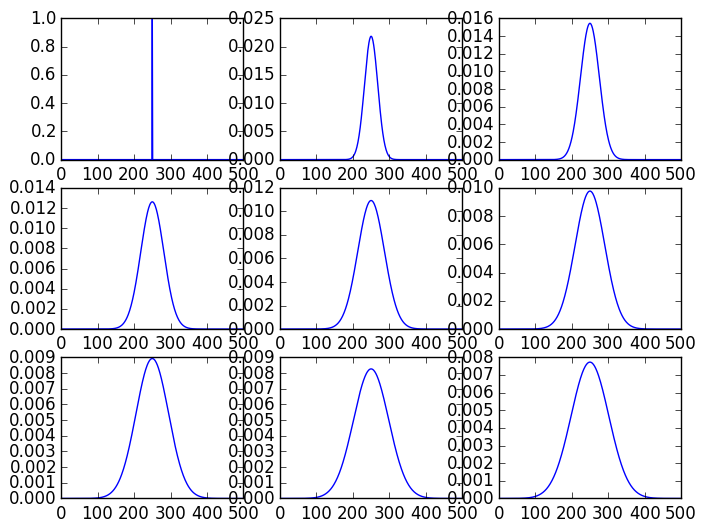

In [77]:
#graficamos grid_x*grid_y plots con diferencia "step" de tiempo entre cada uno
grid_x=3
grid_y=3
step=500
distr_ahora=copy(distribucion_inicial)
for i in 1:grid_y
    for j in 1:grid_x
        subplot(grid_x*100+grid_y*10+(i-1)*grid_x+j)        
        plot( distr_ahora )
        for j in 1:step
            distr_ahora=distribucion_en_sucesor(distr_ahora)
        end
    end
end

Se puede ver que la grafica que se forma parece una guassiana, ahora procedemos a ponerlos todas en una sola grafica con el metodo propuesto

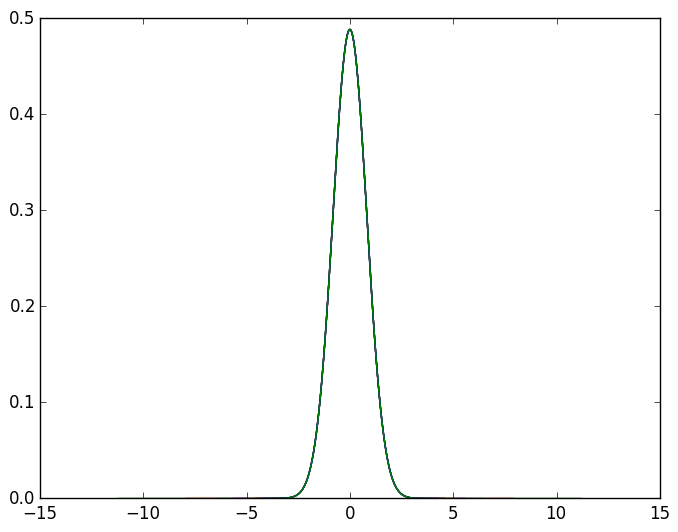

In [78]:
#Usaremos en gran parte las condiciones del codigo de arriba
distr_ahora=copy(distribucion_inicial)
las_x = [((i-1)-(largo_distr-1)/2) for i in 1:largo_distr]

for i in 1:(grid_x*grid_y)
    #Hacemos el ajuste
    x_local = (1/(sqrt((i-1)*step)))*las_x
    distr_local = (sqrt((i-1)*step))*distr_ahora
    #Ploteamos
    plot( x_local,distr_local )
    #Aplicamos la enumeración
    for j in 1:step
        distr_ahora=distribucion_en_sucesor(distr_ahora)
    end
    
end

 Se puede ver que la curva no varía cuando le aplicamos la correción del tiempo sugerida, esto quiere decir que a medida que el tiempo va avanzando la probabilidad decrece proporcional a $\sqrt{t}$ y la distribución se ensancha como eso mismo. La forma es la de una campana de Gauss si la normalizamos tiene la siguiente forma analítica:$$\frac{1}{\sigma \sqrt{2 \pi}} \exp(\frac{(x-\mu)²}{2\sigma}) $$
 Siendo $\mu$ el valor esperado y $\sigma²$ la varianza. En este caso $\mu = 0, \sigma²=0.6366$

**[3] ¿Qué pasa si la condición inicial ahora tiene la probabilidad repartida entre varias celdas?**

In [46]:
#Repartamos la distribucion inicial y fijemonos en la grafica que hicimos la final
largo_distr_en_varias=501
distribucion_inicial_en_varias=zeros(largo_distr_en_varias)
celdas_a_repartir=3
for i in 1:celdas_a_repartir
    distribucion_inicial_en_varias[rand(1:largo_distr_en_varias)]=1/celdas_a_repartir
end

In [70]:
#Cuantos plots y cada cuanto tiempo
plots=5
step=200

200

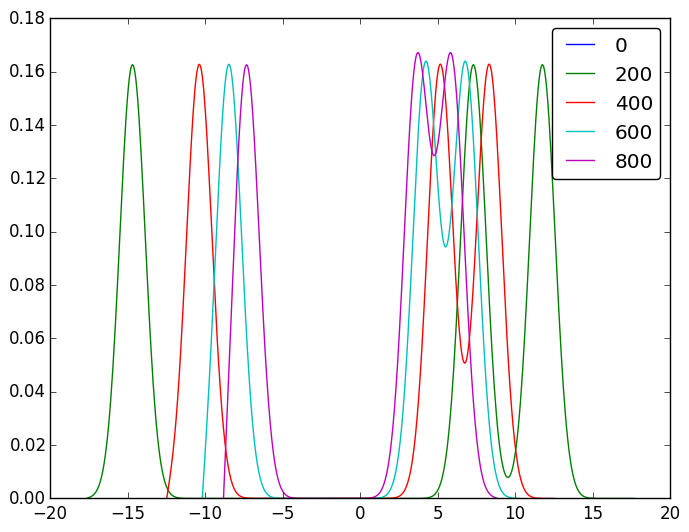

In [71]:
#Preparamos los arrays a usar
distr_ahora=copy(distribucion_inicial_en_varias)
las_x = [((i-1)-(largo_distr_en_varias-1)/2) for i in 1:largo_distr_en_varias]

for i in 1:(plots)
    #Hacemos el ajuste
    x_local = (1/(sqrt((i-1)*step)))*las_x
    distr_local = (sqrt((i-1)*step))*distr_ahora
    #Ploteamos
    plot( x_local,distr_local, label=string((i-1)*step) )
    legend(loc="upper right",fancybox="true")
    #Aplicamos la enumeración
    for j in 1:step
        distr_ahora=distribucion_en_sucesor(distr_ahora)
    end
    
end

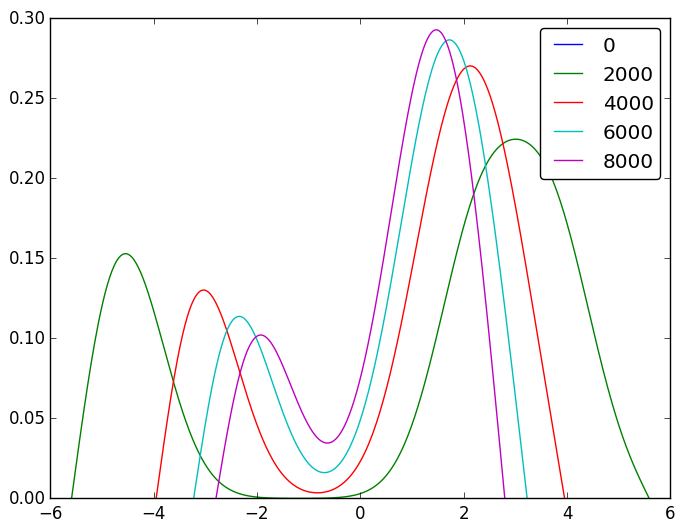

In [69]:
#Preparamos los arrays a usar
distr_ahora=copy(distribucion_inicial_en_varias)
las_x = [((i-1)-(largo_distr_en_varias-1)/2) for i in 1:largo_distr_en_varias]

for i in 1:(plots)
    #Hacemos el ajuste
    x_local = (1/(sqrt((i-1)*step)))*las_x
    distr_local = (sqrt((i-1)*step))*distr_ahora
    #Ploteamos
    plot( x_local,distr_local, label=string((i-1)*step) )
    legend(loc="upper right",fancybox="true")
    #Aplicamos la enumeración
    for j in 1:step
        distr_ahora=distribucion_en_sucesor(distr_ahora)
    end
    
end

Se puede ver que las dsitribuciones se van acercando hacia el origen, se van ensanchando y cuando se choca una montaña con otra estas se mezclan, seguro es demostrable que cuando $t\rightarrow \infty$ nos quedaremos con una distribución como la que solo tiene una delta en el cero

---

## Tiempos de primer paso: sistemas con absorción

Enumeración exacta también se puede aplicar para calcular propiedades de sistemas con absorción para calcular *tiempos de primer paso* (el tiempo para llegar a un sitio *por primera vez*), tal como estudiamos en la tarea 2. Esto se lleva a cabo como sigue.

[3] Implementa enumeración exacta para un caminante aleatorio en una red 1D con una frontera reflejante en $L$ y una frontera absorbente en $0$, como sigue.

Es decir, la probabilidad que llega a $0$ en el tiempo $t$ representa la probabilidad que se *absorbe* en ese tiempo (desaparece del sistema), que corresponde a la probabilidad de que el caminante llegue a 0 *por primera vez* ("tiempo de primer paso").
Esta probabilidad se guarda en un arreglo aparte. Luego a la $P_t(0)$ correspondiente *se le asigna 0*, lo cual corresponde al hecho de que la probabilidad desaparece del sistema.

¿Cómo se satisface la conservación de probabilidad en este caso?

In [137]:
#Primero damos la distribución inicial
largo_distr_absorbente=11
distr_inicial_absorbente = zeros(largo_distr_absorbente)
distr_inicial_absorbente[6]=1

11-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [140]:
function distribucion_en_sucesor_absorbente(distribucion::Array{Float64,1},prob_derecha::Float64=1/3.0,prob_quedarse::Float64=1/3.0)
    #Valores globales
    prob_izquierda=1-prob_derecha-prob_quedarse
    L=length(distribucion)
    nueva_distr = zeros(L)
    
    #fronteras
    
    absorcion=prob_izquierda*distribucion[1]
    
    nueva_distr[1]+= prob_quedarse*distribucion[1]+prob_izquierda*distribucion[2] #Absorción
    
    nueva_distr[L]+=prob_derecha*distribucion[L-1]+prob_quedarse*distribucion[L]
    +prob_derecha*distribucion[L] #Reflexion
    
    #El caso general        
    for i in 2:L-1
        if distribucion[i+1]!=0          
            nueva_distr[i]+=distribucion[i+1]*prob_izquierda
        end
        if distribucion[i-1]!=0
            nueva_distr[i]+=distribucion[i-1]*prob_derecha
        end
        if distribucion[i]!=0
            nueva_distr[i]+=distribucion[i]*prob_quedarse
        end
    end    
    nueva_distr, absorcion
end

distribucion_en_sucesor_absorbente (generic function with 3 methods)

In [141]:
distribucion_en_sucesor_absorbente(distr_inicial_absorbente)

([0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0],0.0)

In [142]:
function distribución_en_t_absorbente(distribucion::Array{Float64,1},tiempo::Int64, prob_derecha::Float64=0.5)
    #Contenedores
    absorciones=zeros(tiempo)
    nuevo=Any[]
    
    for i in 1:tiempo
        #El paso recursivo
        nuevo=distribucion_en_sucesor_absorbente(distribucion)
        #Separamos a la distribucion para que la podamos dar como argumento al metodo de arriba
        distribucion=nuevo[1]
        absorciones[i]=nuevo[2]
    end
    distribucion,absorciones
end

distribución_en_t_absorbente (generic function with 2 methods)

In [143]:
distribución_en_t_absorbente(distr_inicial_absorbente,3)

([0.0,0.0,0.037037,0.111111,0.222222,0.259259,0.222222,0.111111,0.037037,0.0,0.0],[0.0,0.0,0.0])

[4] Utiliza tu código para calcular la distribución de probabilidad $f_T$ del tiempo de primer paso al origen, $T$, para distintos tamaños $L$, y grafícalas en una sola gráfica.

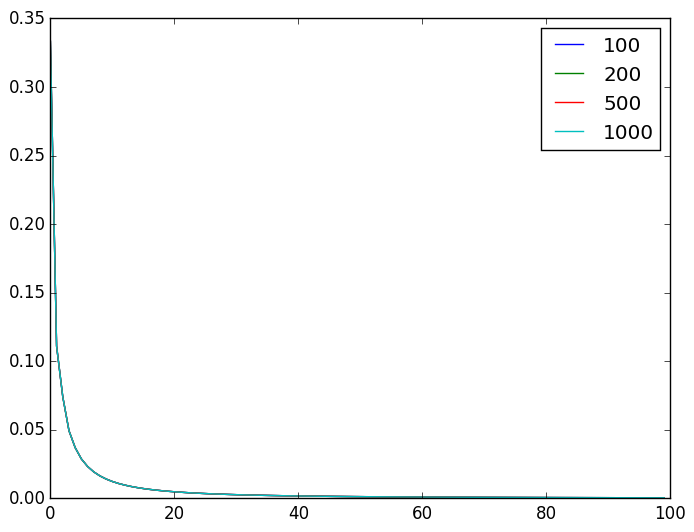

In [158]:
for L in [100,200,500,1000]
    distr_local = zeros(L)
    distr_local[1]=1
    plot(distribución_en_t_absorbente(distr_local,100)[2],"-", label=L)
    legend()
end

Se puede ver que decrece muy rapido y todas estan muy iguales entonces mejor nos fijamos en escala logaritmica

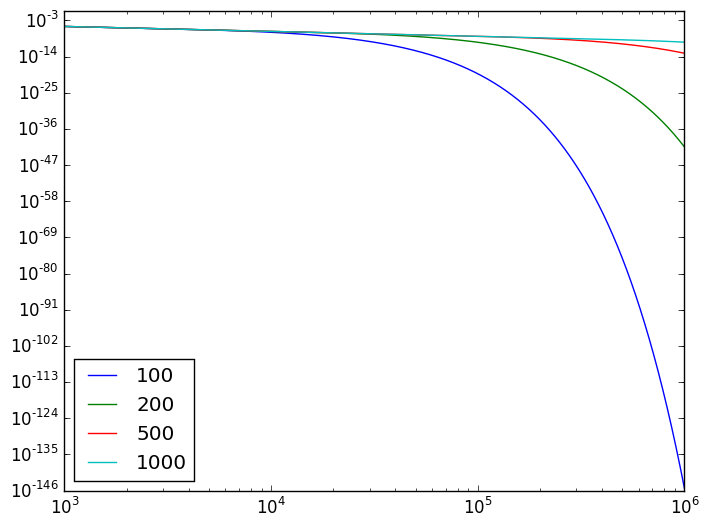

In [173]:
for L in [100,200,500,1000]
    distr_local = zeros(L)
    distr_local[1]=1
    loglog(distribución_en_t_absorbente(distr_local,1000000)[2],"-", label=L)
    legend(loc=3)
    xlim(10^3,10^6)
end

El hecho de que aparezca una recta en una grafica loglog nos habla de que se esta cumpliendo una ley de potencias $y=x^\alpha$ con $\alpha$ la pendiente de de la recta, hasta que hay un cutoff a un decaimiento exponencial, el cual podemos ver en la siguiente grafica

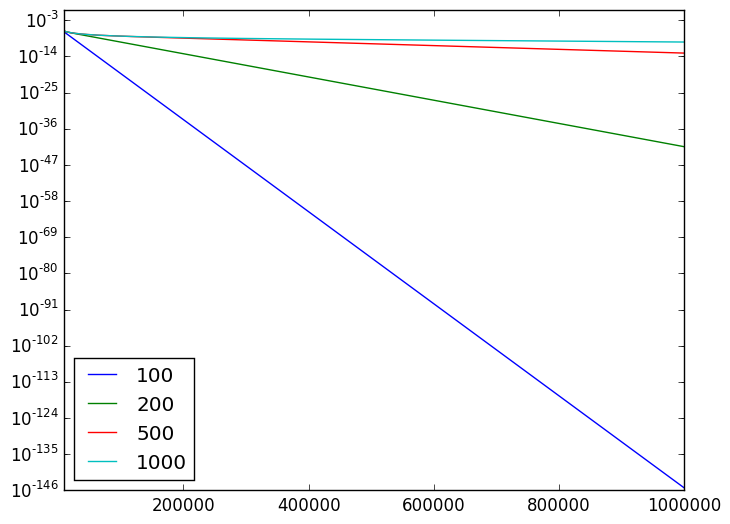

In [179]:
for L in [100,200,500,1000]
    distr_local = zeros(L)
    distr_local[1]=1
    plot(distribución_en_t_absorbente(distr_local,1000000)[2],"-", label=L)
    yscale("log")
    legend(loc=3)
    xlim(10^4,10^6)
end

[5] ¿Qué observas? ¿Cómo se comparan los resultados con los de la tarea 2?

Se puede ver que a pesar de que casi siempre se llega al 0, cuando $L\rightarrow\infty$ se el tiempo promedio en el que llega a 0 es infinito como vimos en la tarea 2, a pesar de que hay un teorema que demuestra que siempre llegará a su origen